<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-04-tree-based-models-bagging-extremely-randomized-trees-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1xLlN9eEG2IYFBlAuwl53aDVxcBkRnkEw)

# 2.4 Extremely Randomized Trees (Extra Trees)

Extremely Randomized Trees (Extra Trees) is a machine learning ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and robustness. It is an extension of the Random Forest algorithm, introduced by Pierre Geurts et al. in 2006, and is designed to further reduce variance and computational complexity by introducing additional randomization.

## Overview

Extra Trees is a powerful ensemble learning method that builds multiple decision trees and combines their predictions. It is particularly effective for high-dimensional datasets and can handle both classification and regression tasks. The key idea behind Extra Trees is to introduce more randomness into the tree-building process, which helps to reduce overfitting and improve generalization.

Key Features:

1. **Random Feature Selection**: Picks random subset of features at each node.
2. **Random Split Thresholds**: Chooses split points randomly, not optimally.
3. **Ensemble Aggregation**: Combines tree predictions (voting for classification, averaging for regression).
4. **No Bootstrap (Optional)**: Uses full dataset per tree, unlike Random Forest.
5. **Low Variance**: High randomization reduces tree correlation.
6. **Fast Training**: Random splits make it quicker than Random Forest.
7. **Noise Robust**: Handles noisy data well.

**Pros**: Fast, robust, less overfitting.  
**Cons**: Slightly less accurate than Random Forest, less interpretable.  
**Uses**: Classification, regression on noisy or high-dimensional data.


### How Extra Trees Works

Extra Trees builds an ensemble of decision trees using a highly randomized approach. The key steps in the Extra Trees algorithm are as follows:

1. Ensemble of Decision Trees

-   Extra Trees builds a collection of decision trees, where each tree is trained on a subset of the data (or the entire dataset, depending on configuration).

-   The final prediction is made by aggregating the outputs of all trees:

  -   `Classification`: Majority voting across all trees.

  -   `Regression`: Averaging the predictions of all trees.

    -   

   Lets denote:

  -   $T$: Number of trees in the ensemble.

  -   $D$: Training dataset with $n$ samples and $m$ features, $D = \{(x_i, y_i)\}_{i=1}^n$, where $x_i$ is a feature vector and $y$ is the target (class label for classification or continuous value for regression).

   -   Each tree $t \in \{1, 2, \dots, T\}$ produces a prediction \$h_t(x)% for an input ( x ).

-   For **classification**:

   -   The final prediction is the majority vote:

$$ \hat{y}(x) = \text{mode} \{ h_1(x), h_2(x), \dots, h_T(x) \} $$

where \#\text{mode}\$ selects the most frequent class across all trees.

-   For `regression`:

   -   The final prediction is the average:

$$ \hat{y}(x) = \frac{1}{T} \sum_{t=1}^T h_t(x) $$

where $h_t(x)$ is the output of the ( t )-th tree.

-   The ensemble reduces variance by combining predictions from multiple trees, which are intentionally diversified through randomization (explained in later steps).

2. Randomized Feature Selection

-   At each node of a decision tree, Extra Trees selects a random subset of features (similar to Random Forests).

-   Unlike Random Forests, which evaluate all possible splits for these features to find the best one (e.g., based on Gini impurity or information gain), Extra Trees picks a split randomly without optimizing.

-   At each node:

-   Select a random subset of $k$ features from the total $m$ features (typically $k = \sqrt{m}$ for classification or $k = m/3$ for regression, though this can be tuned).

-   For each feature in this subset, a random split point is chosen (see Step 3).
    
-   Let $F = \{f_1, f_2, \dots, f_m\}$ be the set of all features.

-   A random subset $F_{\text{node}} \subseteq F$ is chosen, where $|F_{\text{node}}| = k$.

-   No optimization is performed (unlike Random Forests, which minimize a criterion like Gini impurity):

$$ \text{Gini}(S) = 1 - \sum_{c=1}^C p_c^2 $$

or

$$ \text{Information Gain}(S, f) = H(S) - \sum_{v \in \text{values}(f)} \frac{|S_v|}{|S|} H(S_v) $$

where $H(S)$ is the entropy of set $S$, and $S_v$ is the subset of samples where feature $f$ takes value $v$. Extra Trees skips these calculations.

-   By avoiding the search for the optimal split, Extra Trees reduces computational cost, making it faster than Random Forests, especially for large datasets.

3. Randomized Splitting

-   For each feature in the random subset $F_{\text{node}}$, Extra Trees generates a random threshold within the feature’s range.

-   The split is chosen randomly among these thresholds without evaluating their quality (e.g., no comparison of Gini impurity or variance reduction).

-   For a feature $f_j \in F_{\text{node}}$:

  -   Compute the range of values for $f_j$ in the current node’s data: $[\text{min}(f_j), \text{max}(f_j)]$.

  -   Select a random threshold $\theta_j$) uniformly from this range:

$$ \theta_j \sim \text{Uniform}(\text{min}(f_j), \text{max}(f_j)) $$

-   The node splits the data into two subsets:

  -   Left: $\{ x \in S \mid f_j(x) \leq \theta_j \}$

   -   Right: $\{ x \in S \mid f_j(x) > \theta_j \}$

    -   Among the $k$ features in $F_{\text{node}}$, Extra Trees randomly selects one of the proposed splits (or sometimes uses a simple heuristic, like picking the first one, depending on the implementation).

\`- The split condition for a node is:

$$ \text{Split: } f_j(x) \leq \theta_j $$

-   No optimization criterion is computed, unlike Random Forests, which would evaluate:

$$  \text{Best split} = \arg\min_{f_j, \theta_j} \text{Criterion}(S_{\text{left}}, S_{\text{right}}) $$

where the criterion could be Gini impurity, entropy, or variance.

-   The random threshold selection introduces extra randomness, which helps decorrelate the trees further and reduces overfitting while maintaining predictive power.

4. Bootstrap Sampling (Optional)

-   Extra Trees can use bootstrap sampling (random sampling with replacement) to create different training subsets for each tree, similar to Random Forests.

-   Alternatively, Extra Trees often uses the entire training dataset for each tree (no bootstrapping), which is a key distinction from Random Forests and reduces variance further.

-   If bootstrap sampling is enabled:

  -   For each tree $t$, sample $n$ instances from $D$) with replacement to create a subset $D_t$.

  -   The probability that a sample $(x_i, y_i)$ is included in $D_t$ is:

$$  P(\text{included}) = 1 - \left(1 - \frac{1}{n}\right)^n \approx 1 - e^{-1} \approx 0.632 $$

-   Thus, about 63.2% of the data is used per tree, with some samples repeated.

-   If bootstrap sampling is disabled (common in Extra Trees):

    -   Each tree is trained on the full dataset $D$, i.e., $D_t = D$.

-   Using the full dataset (no bootstrapping) reduces variance because each tree sees all the data, but the randomization in feature selection and splitting ensures diversity among trees.

5. Aggregation

-   Once all $T$ trees are built, their predictions are combined to produce the final output.

-   This step is identical to Random Forests but relies on the highly randomized trees built in the previous steps.

-   For a new input $x$:

   -   Each tree $t$ produces a prediction $h_t(x)$.

   -   The final prediction is computed as:

- `Classification`:

$$ \hat{y}(x) = \text{mode} \{ h_1(x), h_2(x), \dots, h_T(x) \} $$

where the mode is the most frequent class label.

         
- `Regression`:


$$  \hat{y}(x) = \frac{1}{T} \sum_{t=1}^T h_t(x) $$

where the average of all tree predictions is taken.

-   The aggregation leverages the law of large numbers to produce a robust prediction, as the errors of individual trees (due to randomness) tend to cancel out.



Below is a flowchart summarizing the Extra Trees algorithm:

![alt text](http://drive.google.com/uc?export=view&id=1AOZtY5BD50W1qRERKfG-OBRakgl6GZqd)


### Key Differences from Random Forests

-   `More Randomness`: Extra Trees randomizes both feature splits and threshold selection, while Random Forests optimize splits based on a criterion (e.g., Gini or entropy).
-   `Faster Training`: Random split selection avoids computationally expensive optimization, making Extra Trees faster to train.
-   `Bias-Variance Tradeoff`: Extra Trees increases bias slightly (due to random splits) but reduces variance, which can lead to better generalization on noisy datasets.
-   `Overfitting`: Extra Trees is less prone to overfitting than Random Forests, especially when the dataset is small or noisy.

### Advantages

-   `Speed`: Faster training due to random split selection.
-   `Robustness`: Handles noisy data well and reduces overfitting.
-   `Simplicity`: Fewer hyperparameters to tune compared to other ensemble methods.
-   `Versatility`: Works for both classification and regression tasks.

### Disadvantages

-   `Less Interpretable`: Like Random Forests, the ensemble nature makes it harder to interpret individual trees.
-   `Slightly Higher Bias`: Random splits may lead to less optimal individual trees compared to optimized splits in Random Forests.
-   `Memory Usage`: Building many trees can be memory-intensive for large datasets.

### When to Use Extra Trees

-   When you need a fast, robust ensemble method for classification or regression.
-   When dealing with noisy or high-dimensional datasets.
-   When computational resources are limited, and training speed is a priority.
-   As an alternative to Random Forests when overfitting is a concern.

## Extra Trees with Python from Scartch



### Classification Example



#### Data

For classification, we will use the {party} packages to build a cforest model on [Health Iinsurance](http://peopleanalytics-regression-book.org/data/health_insurance.csv) data. The dataset contains information about individuals' choices of insurance products based on various features.

Below code involves reading the data, converting columns to categorical types, performing a stratified train-test split, separating features and the target, and converting the data to NumPy arrays.


In [65]:
# Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


mf = pd.read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")
mf['product'] = mf['product'].astype('category')
mf['gender'] = mf['gender'].astype('category')

# Split data into train and test (stratified by product and gender)
mf['product_gender'] = mf['product'].astype(str) + '_' + mf['gender'].astype(str)
seeds = 11076
tr_prop = 0.70
train_df, test_df = train_test_split(
    mf,
    train_size=tr_prop,
    random_state=seeds,
    stratify=mf['product_gender']
)
train_df = train_df.drop(columns=['product_gender'])
test_df = test_df.drop(columns=['product_gender'])

# Prepare features and target
feature_cols = ["age", "household", "position_level", "absent", "gender"]
target_col = "product"
X_train_df = train_df[feature_cols]
y_train_df = train_df[target_col]
X_test_df = test_df[feature_cols]
y_test_df = test_df[target_col]

# Convert features to numeric matrix
le = LabelEncoder()
X_train_df['gender'] = le.fit_transform(X_train_df['gender'])
X_test_df['gender'] = le.transform(X_test_df['gender'])
X_train_matrix = X_train_df.values.astype(np.float64)
X_test_matrix = X_test_df.values.astype(np.float64)

# Encode target variable
le_target = LabelEncoder()
y_train_array = le_target.fit_transform(y_train_df)
y_test_array = le_target.transform(y_test_df)

/tmp/ipython-input-65-2219573613.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_df['gender'] = le.fit_transform(X_train_df['gender'])
/tmp/ipython-input-65-2219573613.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_df['gender'] = le.transform(X_test_df['gender'])


#### Extra Trees Function

Define the extraTrees_classification function in Python, including input validation, and the nested helper functions `bootstrap_sample`, `select_features`, and `build_tree` with the specified logic for tree building, random feature selection, and random splitting.

In [66]:
# Extra Trees Function
import numpy as np
from collections import Counter
import math # Import math for sqrt

# Function to create a bootstrap sample (helper function, can be defined outside or inside)
def bootstrap_sample(data, target):
    n = len(data)
    indices = np.random.choice(n, n, replace=True)
    # Use integer indexing for NumPy arrays
    return data[indices], target[indices]

# Function to select random features (helper function)
def select_features(n_features, k):
    # Ensure k does not exceed n_features
    k = min(k, n_features)
    return np.random.choice(n_features, k, replace=False)

# Function to build a single decision tree (helper function)
def build_tree(data, target, mtry, nodesize, max_depth=10, depth=0):
    # Check for valid data and stopping conditions
    if data.shape[0] == 0 or depth >= max_depth or data.shape[0] <= nodesize or len(np.unique(target)) == 1:
        # Return leaf node with majority class prediction
        if len(target) > 0:
             prediction = Counter(target).most_common(1)[0][0]
        else:
             # Handle cases where target is empty due to splitting issues
             prediction = None # Or a default value, depending on how empty splits are handled
        return {'leaf': True, 'prediction': prediction}

    n_features = data.shape[1]
    features = select_features(n_features, mtry)

    best_feature = None
    best_threshold = None
    best_split = None

    # Try to find a valid random split among selected features
    for f_idx in features:
        values = data[:, f_idx]
        # Check if feature has more than one unique value to split on
        if len(np.unique(values)) > 1:
            # Generate a random threshold within the range of the feature's values
            threshold = np.random.uniform(np.min(values), np.max(values))

            # Split data based on the random threshold
            left_indices = data[:, f_idx] <= threshold
            right_indices = data[:, f_idx] > threshold

            left_data = data[left_indices]
            left_target = target[left_indices]
            right_data = data[right_indices]
            right_target = target[right_indices]

            # Check if the split results in non-empty subsets
            if len(left_data) > 0 and len(right_data) > 0:
                best_feature = f_idx
                best_threshold = threshold
                best_split = {
                    'left_data': left_data,
                    'left_target': left_target,
                    'right_data': right_data,
                    'right_target': right_target
                }
                # In Extra Trees, we take the first valid random split found among the selected features
                break

    # If no valid split was found among the selected features, return a leaf node
    if best_feature is None:
        if len(target) > 0:
             prediction = Counter(target).most_common(1)[0][0]
        else:
             prediction = None
        return {'leaf': True, 'prediction': prediction}

    # Recursively build the left and right subtrees
    left_tree = build_tree(best_split['left_data'], best_split['left_target'], mtry, nodesize, max_depth, depth + 1)
    right_tree = build_tree(best_split['right_data'], best_split['right_target'], mtry, nodesize, max_depth, depth + 1)

    # Return an internal node
    return {
        'leaf': False,
        'feature': best_feature,
        'threshold': best_threshold,
        'left': left_tree,
        'right': right_tree
    }


# 1. Define the main Extra Trees classification function
def extraTrees_classification(x, y, ntree=500, mtry=None, nodesize=5):
    # 2. Input validation
    if not isinstance(x, np.ndarray) or not np.issubdtype(x.dtype, np.number):
        raise ValueError("x must be a numeric NumPy array")
    if not isinstance(y, np.ndarray): # Assuming y is already encoded to numeric labels
         raise ValueError("y must be a NumPy array")
    if x.shape[0] != len(y):
        raise ValueError("Number of rows in x must match length of y")
    if not isinstance(nodesize, int) or nodesize < 1:
        raise ValueError("nodesize must be a positive integer")

    n_features = x.shape[1]
    if mtry is None:
        mtry = max(1, int(math.sqrt(n_features))) # Default mtry
    if not isinstance(mtry, int) or mtry < 1 or mtry > n_features:
         # Adjust mtry if it's out of bounds after default calculation
         mtry = max(1, min(mtry, n_features))
         # Consider raising a warning or error if the initial value was invalid
         # print(f"Warning: mtry adjusted to {mtry} as it was out of bounds.")


    # 13. Build ntree trees
    trees = []
    for _ in range(ntree):
        # Use bootstrap sample (as per R example's logic)
        sample_data, sample_target = bootstrap_sample(x, y)
        # Build tree using the helper function
        tree = build_tree(sample_data, sample_target, mtry, nodesize)
        trees.append(tree)

    # 14. Return the model
    return {'trees': trees, 'mtry': mtry, 'nodesize': nodesize}

# Note: The predict_extraTrees function would be needed separately to use this model.
# This code block only implements the training function.

#### Prediction Function

`predict_extraTrees_classification` function implements the logic to use the trained model and make predictions by traversing each tree and performing majority voting. This involves defining the inner predict_tree helper function as described in the instructions and then using it to collect predictions from all trees for each data point before determining the final prediction via majority vote.

In [61]:
# Prediction Function
import numpy as np
from collections import Counter

# 1. Define a Python function predict_extraTrees_classification
def predict_extraTrees_classification(model, x):
    # Input validation (optional but good practice)
    if not isinstance(x, np.ndarray) or not np.issubdtype(x.dtype, np.number):
        raise ValueError("Input x must be a numeric NumPy array")

    # 2. Implement a helper function predict_tree within predict_extraTrees_classification
    def predict_tree(tree, row):
        # 3. The predict_tree function should recursively traverse the tree
        if tree['leaf']:
            # If the current node is a leaf, return the stored prediction
            return tree['prediction']

        # If the current node is an internal node, compare the feature value with the threshold
        # Ensure the feature index is valid for the current row
        feature_index = tree['feature']
        if feature_index >= len(row):
             # This case should ideally not happen if training data features match prediction data features
             # Handle or raise an error if necessary; here, return None or a default
             # print(f"Warning: Feature index {feature_index} out of bounds for row with {len(row)} features.")
             return None # Indicate an issue with this tree's prediction for this row

        if row[feature_index] <= tree['threshold']:
            # Recursively call predict_tree on the left child
            return predict_tree(tree['left'], row)
        else:
            # Recursively call predict_tree on the right child
            return predict_tree(tree['right'], row)

    predictions = []
    # 4. In the predict_extraTrees_classification function, iterate through each data row in the input x.
    for row_idx in range(x.shape[0]):
        row = x[row_idx, :] # Get the current row as a NumPy array
        tree_predictions = []
        # 5. For each row, iterate through all the trees in the model['trees'].
        for tree in model['trees']:
            # 6. Call the predict_tree helper function for each tree and the current row
            tree_pred = predict_tree(tree, row)
            # Collect predictions, ignoring None if predict_tree returned it due to error
            if tree_pred is not None:
                 tree_predictions.append(tree_pred)

        # 7. Collect the predictions from all trees for the current row (done in the loop)
        # 8. Determine the final prediction for the row by performing a majority vote
        if tree_predictions: # Ensure there are predictions to vote on
            final_prediction = Counter(tree_predictions).most_common(1)[0][0]
        else:
             # Handle case where no tree gave a valid prediction for this row
             # Could return a default, raise an error, or use a specific indicator
             final_prediction = None # Indicate failure to predict

        # 9. Store the final prediction for the current row.
        predictions.append(final_prediction)

    # 10. After processing all rows, return a NumPy array containing the final predictions.
    return np.array(predictions)

# Note: This function is now defined and ready to be used with a model trained by extraTrees_classification

#### Fit Extra Trees Model

The main function for fitting the Extra Trees model is `extraTrees()`. The function takes the following arguments:

-   The `ntree` parameter sets the number of trees in the Extra Trees ensemble.

-   The `mtry` parameter specifies the number of features to consider at each split. For Extra Trees, this is typically set to the square root of the total number of features.

-   The `nodesize` parameter sets the minimum number of samples required to split a node.



In [67]:
import numpy as np
import math # Ensure math is imported for sqrt if not already

# 1. Set the random seed for NumPy
seeds = 123
np.random.seed(seeds)

# Get the number of features for mtry calculation
n_features = X_train_matrix.shape[1]

# 2. Call the previously defined extraTrees_classification function
# Use the best parameters found in the R notebook's grid search example
# The R notebook's grid search found ntree=100, mtry=4, nodesize=10 as best for regression.
# For classification, let's use the mtry calculation from the classification R example (sqrt(n_features))
# and the ntree=500 and nodesize=5 from the initial classification R example.
# We will use the parameters from the R classification example here.
et_model = extraTrees_classification(
    x = X_train_matrix,
    y = y_train_array,
    ntree = 500,
    mtry = max(1, int(math.sqrt(n_features))), # Use sqrt(n_features) as in the R classification example
    nodesize = 5
)

# 3. Store the returned trained model object (a dictionary) in et_model (done above)

print("Extra Trees Classification model trained successfully.")
print(f"Number of trees: {len(et_model['trees'])}")
print(f"mtry used: {et_model['mtry']}")
print(f"nodesize used: {et_model['nodesize']}")

Extra Trees Classification model trained successfully.
Number of trees: 500
mtry used: 2
nodesize used: 5


#### Prediction and Evaluation

Make predictions on the test set using the trained Extra Trees classification model and the custom prediction function, then evaluate the model's performance using accuracy and a confusion matrix.

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Make predictions on the test set
# Use the previously defined predict_extraTrees_classification function
predictions = predict_extraTrees_classification(et_model, X_test_matrix)

# 2. Evaluate accuracy
# Use the original test target array (y_test_array) for evaluation
accuracy = accuracy_score(y_test_array, predictions)
print(f"\nAccuracy: {accuracy:.3f}")

# 3. Output confusion matrix
conf_matrix = confusion_matrix(y_test_array, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.791

Confusion Matrix:
[[118  25   5]
 [ 13 120   4]
 [ 17  27 106]]


#### Feature Importance

Compute the permutation importance for the Extra Trees classification model using the custom function and the training data, similar to the R example.

In [69]:
# 1. Implement a Python function to compute permutation importance for classification
def compute_permutation_importance_classification(model, x, y, feature_names):
    # Calculate baseline accuracy
    pred_baseline = predict_extraTrees_classification(model, x)
    baseline_accuracy = accuracy_score(y, pred_baseline)

    # Initialize importance vector
    importance = {}

    # Permute each feature and measure accuracy drop
    for i in range(x.shape[1]):
        x_permuted = x.copy()
        # Shuffle feature i (column i)
        np.random.shuffle(x_permuted[:, i])

        pred_permuted = predict_extraTrees_classification(model, x_permuted)
        permuted_accuracy = accuracy_score(y, pred_permuted)

        # Importance is the drop in accuracy
        importance[feature_names[i]] = baseline_accuracy - permuted_accuracy

    return importance

# 2. Define feature names
feature_names = ["age", "household", "position_level", "absent", "gender"] # Match the order in X_train_matrix

# 3. Compute importance using the training data (as done in the R notebook for classification importance)
# The R notebook calculates importance on the training set for classification.
importance = compute_permutation_importance_classification(
  model = et_model,
  x = X_train_matrix,
  y = y_train_array,
  feature_names = feature_names
)

# 4. Create a data frame for importance (optional, but good for plotting)
var_imp_et = pd.DataFrame(list(importance.items()), columns=['Variable', 'Importance'])

# Display importance
print("\nFeature Importance (Accuracy Drop):")
print(var_imp_et)


Feature Importance (Accuracy Drop):
         Variable  Importance
0             age    0.318855
1       household    0.253702
2  position_level    0.075025
3          absent    0.046397
4          gender    0.116486


/tmp/ipython-input-70-958889775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=var_imp_et_sorted, palette='viridis') # Use a color palette


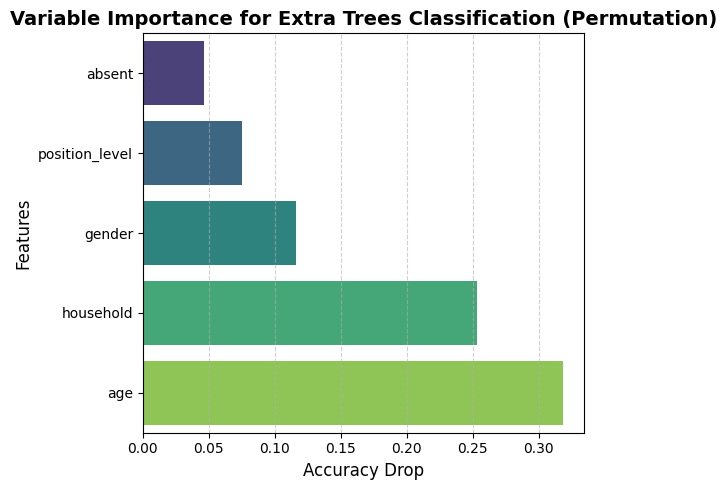

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create ggplot2 plot equivalent in Python using matplotlib and seaborn
plt.figure(figsize=(6, 5)) # Adjust figure size as needed

# Sort by importance for better visualization
var_imp_et_sorted = var_imp_et.sort_values('Importance')

sns.barplot(x='Importance', y='Variable', data=var_imp_et_sorted, palette='viridis') # Use a color palette

plt.title("Variable Importance for Extra Trees Classification (Permutation)", fontsize=14, fontweight='bold')
plt.xlabel("Accuracy Drop", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6) # Add a grid for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


#### Hyperparameter Tuning

Hyperparameter tuning is an essential step in optimizing the performance of Extra Trees models. The key hyperparameters to tune include:

-   `ntree`: Number of trees in the ensemble. More trees can improve performance but increase computation time.
-   `mtry`: Number of features to consider at each split. A smaller value can reduce overfitting, while a larger value can increase model complexity.
-   `nodesize`: Minimum number of samples required to split a node. Larger values can prevent overfitting.

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import math
from itertools import product
from collections import Counter

1. Custom Cross-Validation Function

In [71]:
# 1. Custom Cross-Validation Function
def custom_cv(x, y, k=3, params=None, seed=11076):
    np.random.seed(seed)
    kf = KFold(n_splits=k, shuffle=True, random_state=seed)
    accuracies = []

    for train_idx, val_idx in kf.split(x):
        x_train = x[train_idx]
        y_train = y[train_idx]
        x_val = x[val_idx]
        y_val = y[val_idx]

        # Train model with given parameters
        model = extraTrees_classification(
            x_train,
            y_train,
            ntree=params['ntree'],
            mtry=params['mtry'],
            nodesize=params['nodesize']
        )

        # Predict on validation set
        pred = predict_extraTrees_classification(model, x_val)

        # Filter out None predictions (if any)
        valid_mask = pred != None
        if valid_mask.sum() > 0:
            accuracy = np.mean(pred[valid_mask] == y_val[valid_mask])
            accuracies.append(accuracy)

    return np.mean(accuracies) if accuracies else 0.0

2. Set Parameters for grid serach

In [75]:
# 2. Set Parameters for Grid Search
import numpy as np
import math # Ensure math is imported if not already
from itertools import product # Import the product function

np.random.seed(seeds)
n_features = X_train_matrix.shape[1]
param_grid = list(product(
    [50, 100], # ntree values
    [max(1, int(math.sqrt(n_features))), max(1, int(n_features/3)), max(1, int(n_features/2))], # mtry values
    [1, 5, 10] # nodesize values
))
param_grid = [dict(ntree=p[0], mtry=p[1], nodesize=p[2]) for p in param_grid]

# Print the generated parameter grid (optional)
# print("Generated parameter grid:")
# for params in param_grid:
#     print(params)

print(f"Generated {len(param_grid)} hyperparameter combinations.")

Generated 18 hyperparameter combinations.


3. Perform Grid Search with 3-Fold Cross-Validation

In [78]:
# 3. Perform Grid Search with 3-Fold Cross-Validation
grid_results = []
for i, params in enumerate(param_grid, 1):
    print(f"Evaluating parameters: {i} of {len(param_grid)}")
    accuracy = custom_cv(X_train_matrix, y_train_array, k=3, params=params, seed=seeds)
    grid_results.append({'params': params, 'accuracy': accuracy})

Evaluating parameters: 1 of 18
Evaluating parameters: 2 of 18
Evaluating parameters: 3 of 18
Evaluating parameters: 4 of 18
Evaluating parameters: 5 of 18
Evaluating parameters: 6 of 18
Evaluating parameters: 7 of 18
Evaluating parameters: 8 of 18
Evaluating parameters: 9 of 18
Evaluating parameters: 10 of 18
Evaluating parameters: 11 of 18
Evaluating parameters: 12 of 18
Evaluating parameters: 13 of 18
Evaluating parameters: 14 of 18
Evaluating parameters: 15 of 18
Evaluating parameters: 16 of 18
Evaluating parameters: 17 of 18
Evaluating parameters: 18 of 18


In [79]:
# Convert results to DataFrame for easier handling
grid_results_df = pd.DataFrame([
    {**r['params'], 'accuracy': r['accuracy']}
    for r in grid_results
])

4. Get Best Parameters

In [80]:
# 4. Get Best Parameters
best_params = grid_results_df.loc[grid_results_df['accuracy'].idxmax()]
print("Best parameters:")
print(best_params.drop('accuracy').to_dict())
print(f"Best CV accuracy: {best_params['accuracy']:.4f}")

Best parameters:
{'ntree': 100.0, 'mtry': 2.0, 'nodesize': 1.0}
Best CV accuracy: 0.7927


5. Train Final Model with Best Parameters

In [81]:
# 5. Train Final Model with Best Parameters
final_model = extraTrees_classification(
    X_train_matrix,
    y_train_array,
    ntree=int(best_params['ntree']),
    mtry=int(best_params['mtry']),
    nodesize=int(best_params['nodesize'])
)

6. Prediction and Evaluation

In [82]:
# 6. Prediction and Evaluation
test_pred = predict_extraTrees_classification(final_model, X_test_matrix)

# Filter out None predictions for evaluation
valid_mask = test_pred != None
test_pred_valid = test_pred[valid_mask]
y_test_valid = y_test_array[valid_mask]

In [84]:
# Convert predictions back to original labels for evaluation
test_pred_labels = le_target.inverse_transform(test_pred_valid.astype(int))
y_test_labels = le_target.inverse_transform(y_test_valid)
# Confusion matrix
conf_matrix = confusion_matrix(y_test_labels, test_pred_labels, labels=le_target.classes_)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=le_target.classes_,
    columns=le_target.classes_
)
print("Test set confusion matrix:")
print(conf_matrix_df)

Test set confusion matrix:
     A    B    C
A  117   24    7
B   12  119    6
C   16   28  106


In [85]:
# Accuracy
accuracy = np.mean(test_pred_valid == y_test_valid)
print(f"Test set accuracy: {accuracy:.4f}")

# Precision, Recall, F1-Score per class
precision = precision_score(y_test_labels, test_pred_labels, average=None, labels=le_target.classes_)
recall = recall_score(y_test_labels, test_pred_labels, average=None, labels=le_target.classes_)
f1 = f1_score(y_test_labels, test_pred_labels, average=None, labels=le_target.classes_)

print("Precision per class:")
for cls, prec in zip(le_target.classes_, precision):
    print(f"{cls}: {prec:.4f}")
print("Recall per class:")
for cls, rec in zip(le_target.classes_, recall):
    print(f"{cls}: {rec:.4f}")
print("F1-score per class:")
for cls, f1_val in zip(le_target.classes_, f1):
    print(f"{cls}: {f1_val:.4f}")

Test set accuracy: 0.7862
Precision per class:
A: 0.8069
B: 0.6959
C: 0.8908
Recall per class:
A: 0.7905
B: 0.8686
C: 0.7067
F1-score per class:
A: 0.7986
B: 0.7727
C: 0.7881


7. Feature Importance

Feature Importance:
age: 0.2829
absent: 0.2811
household: 0.2216
position_level: 0.1666
gender: 0.0478


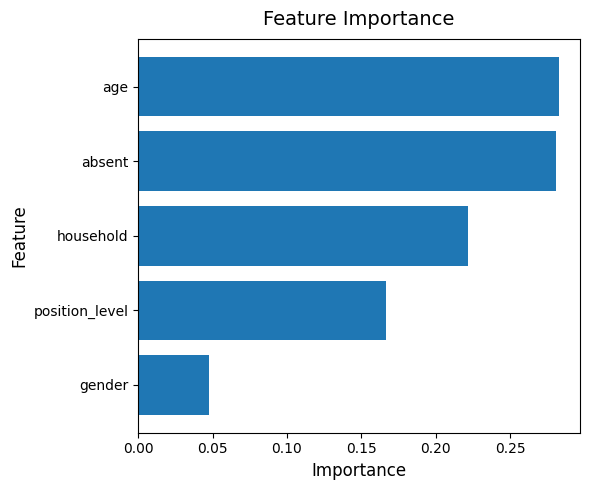

In [87]:
# 7. Feature Importance
def feature_importance(model, x, feature_names):
    n_features = x.shape[1]
    importance = np.zeros(n_features)

    def count_features(node):
        if not node['leaf']:
            importance[node['feature']] += 1
            count_features(node['left'])
            count_features(node['right'])

    for tree in model['trees']:
        count_features(tree)

    # Normalize importance
    importance = importance / np.sum(importance) if np.sum(importance) > 0 else importance
    return dict(zip(feature_names, importance))

# Calculate feature importance
imp = feature_importance(final_model, X_train_matrix, feature_cols)
print("Feature Importance:")
for feature, importance in sorted(imp.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

# Visualize feature importance using matplotlib
imp_df = pd.DataFrame(list(imp.items()), columns=['Feature', 'Importance'])
imp_df = imp_df.sort_values(by='Importance', ascending=True)  # For horizontal bar plot

plt.figure(figsize=(6, 5))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='#1f77b4')
plt.title('Feature Importance', fontsize=14, pad=10)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

### Regression Example




In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import math
from itertools import product

#### Data

In [112]:
# Load and prepare Boston Housing data
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Set random seed for reproducibility
np.random.seed(123)

# Select relevant columns
df = df[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Convert CHAS to category
df['CHAS'] = df['CHAS'].astype('category')

# Ensure RAD and TAX are numeric
df['RAD'] = df['RAD'].astype(float)
df['TAX'] = df['TAX'].astype(float)

# Apply one-hot encoding to CHAS
df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)

# Split data into training (70%) and test (30%) sets
train, test = train_test_split(df, train_size=0.70, random_state=101)

# Feature scaling
scaler = StandardScaler()
numeric_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

# Define predictors and target
predictors = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CHAS_1']
available_predictors = [col for col in predictors if col in train.columns and col in test.columns]
X_train = train[available_predictors].values.astype(np.float64)
y_train = train['MEDV'].values.astype(np.float64)
X_test = test[available_predictors].values.astype(np.float64)
y_test = test['MEDV'].values.astype(np.float64)

#### Extra Trees function (for regression)

Define the Python function `extraTrees_regression` and its helper functions `bootstrap_sample`, `select_features`, and the `recursive build_tree_regression`. Implement input validation, bootstrap sampling, random feature selection, and the tree building logic focusing on minimizing MSE for splits and updating feature importance.

In [113]:
import numpy as np
import math

# Function to create a bootstrap sample
def bootstrap_sample(data, target):
    n = data.shape[0]
    indices = np.random.choice(n, n, replace=True)
    return data[indices], target[indices]

# Function to select random features
def select_features(n_features, k):
    k = min(k, n_features) # Ensure k is not more than available features
    return np.random.choice(n_features, k, replace=False)

# Function to calculate Mean Squared Error
def calculate_mse(target):
    if len(target) == 0:
        return np.nan # Handle empty target
    return np.mean((target - np.mean(target))**2)

# Function to build a single decision tree for regression
def build_tree_regression(data, target, mtry, nodesize, feature_importance, max_depth=20, depth=0):
    # Stopping conditions
    if data.shape[0] <= nodesize or depth >= max_depth or len(np.unique(target)) <= 1:
        # Return leaf node with mean prediction
        return {'leaf': True, 'prediction': np.mean(target) if len(target) > 0 else np.nan}

    n_features = data.shape[1]
    features = select_features(n_features, mtry)

    best_feature = None
    best_threshold = None
    best_split = None
    best_mse = float('inf')

    # Find the best random split among selected features based on MSE
    for f_idx in features:
        values = data[:, f_idx]
        # Only consider splitting if the feature has more than one unique value
        if len(np.unique(values)) > 1:
            # Choose a random threshold between min and max values in the current node's data
            threshold = np.random.uniform(np.min(values), np.max(values))

            # Split data
            left_indices = data[:, f_idx] <= threshold
            right_indices = data[:, f_idx] > threshold

            left_target = target[left_indices]
            right_target = target[right_indices]

            # Ensure non-empty splits
            if len(left_target) > 0 and len(right_target) > 0:
                # Calculate MSE for the split
                mse = calculate_mse(left_target) + calculate_mse(right_target) # Sum of MSE of children

                # Check if this random split is the best found so far for this node
                if not np.isnan(mse) and mse < best_mse:
                    best_mse = mse
                    best_feature = f_idx
                    best_threshold = threshold
                    best_split = {
                        'left_data': data[left_indices],
                        'left_target': left_target,
                        'right_data': data[right_indices],
                        'right_target': right_target
                    }

    # If no valid split was found among the selected features, return a leaf node
    if best_feature is None:
        return {'leaf': True, 'prediction': np.mean(target) if len(target) > 0 else np.nan}

    # Update feature importance count for the chosen splitting feature
    feature_importance[best_feature] += 1

    # Recursively build subtrees
    left_tree = build_tree_regression(best_split['left_data'], best_split['left_target'], mtry, nodesize, feature_importance, max_depth, depth + 1)
    right_tree = build_tree_regression(best_split['right_data'], best_split['right_target'], mtry, nodesize, feature_importance, max_depth, depth + 1)

    # Return internal node
    return {
        'leaf': False,
        'feature': best_feature,
        'threshold': best_threshold,
        'left': left_tree,
        'right': right_tree
    }


# Define the main Extra Trees regression function
def extraTrees_regression(x, y, ntree=100, mtry=None, nodesize=5):
    # Input validation
    if not isinstance(x, np.ndarray) or not np.issubdtype(x.dtype, np.number):
        raise ValueError("x must be a numeric NumPy array")
    if not isinstance(y, np.ndarray) or not np.issubdtype(y.dtype, np.number):
        raise ValueError("y must be a numeric NumPy array")
    if x.shape[0] != len(y):
        raise ValueError("Number of rows in x must match length of y")
    if not isinstance(ntree, int) or ntree < 1:
         raise ValueError("ntree must be a positive integer")
    if not isinstance(nodesize, int) or nodesize < 1:
        raise ValueError("nodesize must be a positive integer")

    n_features = x.shape[1]
    if mtry is None:
        mtry = max(1, int(math.sqrt(n_features))) # Default mtry
    if not isinstance(mtry, int) or mtry < 1 or mtry > n_features:
         # Adjust mtry if it's out of bounds after default calculation
         mtry = max(1, min(mtry, n_features))


    # Initialize feature importance storage (using a list indexed by feature index)
    # This will be passed to the recursive function to be updated
    feature_importance_counts = [0] * n_features

    trees = []
    for _ in range(ntree):
        # Use bootstrap sample
        sample_data, sample_target = bootstrap_sample(x, y)
        # Build tree for regression
        tree = build_tree_regression(sample_data, sample_target, mtry, nodesize, feature_importance_counts)
        trees.append(tree)

    # Normalize feature importance counts by the total number of splits where features were used
    total_splits = sum(feature_importance_counts)
    normalized_importance = [count / total_splits if total_splits > 0 else 0 for count in feature_importance_counts]

    # Return the model including trees and normalized feature importance
    return {'trees': trees, 'mtry': mtry, 'nodesize': nodesize, 'feature_importance': normalized_importance, 'feature_names': [f'feature_{i}' for i in range(n_features)]}

#### Prediction Function

In [114]:
import numpy as np

# 1. Define a Python function predict_extraTrees_regression
def predict_extraTrees_regression(model, x):
    # Input validation (optional but good practice)
    if not isinstance(x, np.ndarray) or not np.issubdtype(x.dtype, np.number):
        raise ValueError("Input x must be a numeric NumPy array")

    # 2. Implement a helper function predict_tree_regression
    def predict_tree_regression(tree, row):
        # 3. The predict_tree_regression function should recursively traverse the tree
        if tree['leaf']:
            # If the current node is a leaf, return the stored prediction (mean)
            return tree['prediction']

        # If the current node is an internal node, compare the feature value with the threshold
        feature_index = tree['feature']
        threshold = tree['threshold']

        if row[feature_index] <= threshold:
            # Recursively call predict_tree_regression on the left child
            return predict_tree_regression(tree['left'], row)
        else:
            # Recursively call predict_tree_regression on the right child
            return predict_tree_regression(tree['right'], row)

    predictions = []
    # 4. In the predict_extraTrees_regression function, iterate through each data row in the input x.
    for row_idx in range(x.shape[0]):
        row = x[row_idx, :] # Get the current row as a NumPy array
        tree_predictions = []
        # 5. For each row, iterate through all the trees in the model['trees'].
        for tree in model['trees']:
            # 6. Call the predict_tree_regression helper function for each tree and the current row
            tree_pred = predict_tree_regression(tree, row)
            # Collect predictions, handling potential NaN from leaf nodes in empty splits
            if not np.isnan(tree_pred):
                 tree_predictions.append(tree_pred)

        # 7. Collect the predictions from all trees for the current row (done in the loop)
        # 8. Calculate the final prediction for the row by averaging the predictions collected from all trees.
        if tree_predictions: # Ensure there are predictions to average
            final_prediction = np.mean(tree_predictions)
        else:
             # Handle case where no tree gave a valid prediction for this row
             final_prediction = np.nan # Or some other indicator/default

        # 9. Store the final prediction for the current row.
        predictions.append(final_prediction)

    # 10. After processing all rows, return a NumPy array containing the final averaged predictions for all data points.
    return np.array(predictions)

# The function is now defined and ready to be used for regression prediction.

#### Fit the Extra Tree Model

In [94]:
# 1. Set the random seed for NumPy
seeds = 11076
np.random.seed(seeds)


# 2. Call the previously defined extraTrees_regression function
et_model = extraTrees_regression(X_train,
                                  y_train,
                                  ntree=100,
                                  mtry=int(math.sqrt(X_train.shape[1])),
                                  nodesize=5)

# 3. Store the returned trained model object (a dictionary) in et_model (done above)

# 4. Print a confirmation message
print("Extra Trees Regression model trained successfully.")
print(f"Number of trees: {len(et_model['trees'])}")
print(f"mtry used: {et_model['mtry']}")
print(f"nodesize used: {et_model['nodesize']}")

Extra Trees Regression model trained successfully.
Number of trees: 100
mtry used: 3
nodesize used: 5


#### Prediction and Evaluation

In [98]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Prediction and Evaluation
y_pred = predict_extraTrees_regression(et_model, X_test)
# Filter out NaN predictions (if any)
valid_mask = ~np.isnan(y_pred)
y_pred_valid = y_pred[valid_mask]
y_test_valid = y_test[valid_mask]

# Calculate MSE and R²
mse = mean_squared_error(y_test_valid, y_pred_valid)
r2 = r2_score(y_test_valid, y_pred_valid)
print("Default Model Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Default Model Evaluation:
Mean Squared Error: 19.2553
R² Score: 0.8060


#### Feature Importance

In [99]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 1. Define a Python function compute_permutation_importance_regression
def compute_permutation_importance_regression(model, x, y, feature_names):
    # 2. Calculate the baseline RMSE
    pred_baseline = predict_extraTrees_regression(model, x)
    baseline_rmse = np.sqrt(mean_squared_error(y, pred_baseline))

    # 3. Initialize importance dictionary
    importance = {}

    # 4. Iterate through each feature index
    for i in range(x.shape[1]):
        # 5. Create a copy of the input data x
        x_permuted = x.copy()

        # 6. Randomly shuffle the values in the current feature's column
        np.random.shuffle(x_permuted[:, i])

        # 7. Make predictions on the permuted data
        pred_permuted = predict_extraTrees_regression(model, x_permuted)

        # 8. Calculate the RMSE of the predictions on the permuted data
        permuted_rmse = np.sqrt(mean_squared_error(y, pred_permuted))

        # 9. Calculate the importance as the increase in RMSE
        # Ensure feature_names has enough entries
        if i < len(feature_names):
            importance[feature_names[i]] = permuted_rmse - baseline_rmse
        else:
            # Handle case where feature_names is shorter than number of features
            importance[f'feature_{i}'] = permuted_rmse - baseline_rmse


    # 11. Return the dictionary of feature importance scores
    return importance

In [101]:
import pandas as pd

# 3. Feature Importance
feature_names = available_predictors
imp = et_model['feature_importance']
print("\nFeature Importance:")
for feature, importance in sorted(zip(feature_names, imp), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

# Visualize feature importance
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': imp})
imp_df = imp_df.sort_values(by='Importance', ascending=True)


Feature Importance:
RM: 0.1225
LSTAT: 0.1192
CRIM: 0.0998
B: 0.0940
DIS: 0.0924
AGE: 0.0896
NOX: 0.0815
PTRATIO: 0.0630
TAX: 0.0582
INDUS: 0.0580
RAD: 0.0532
ZN: 0.0420
CHAS_1: 0.0264


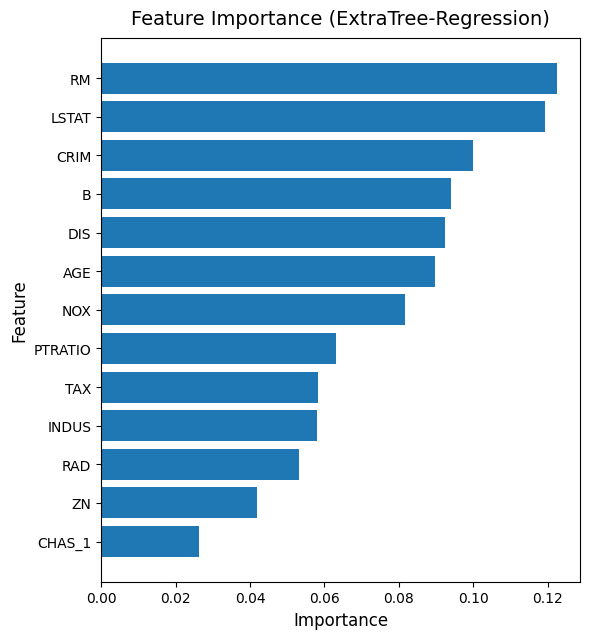

In [105]:
import matplotlib.pyplot as plt


# Visualize feature importance
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': imp})
imp_df = imp_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(6, 6.5))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='#1f77b4')
plt.title('Feature Importance (ExtraTree-Regression)', fontsize=14, pad=10)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning

Hyperparameter tuning is an essential step in optimizing the performance of Extra Trees models. The key hyperparameters to tune include:

-   `ntree`: Number of trees in the ensemble. More trees can improve performance but increase computation time.
-   `mtry`: Number of features to consider at each split. A smaller value can reduce overfitting, while a larger value can increase model complexity.
-   `nodesize`: Minimum number of samples required to split a node. Larger values can prevent overfitting.


1. Coustom Cross-validation function

In [115]:
import numpy as np
from sklearn.metrics import mean_squared_error

def custom_cv_regression(x, y, k=3, params=None, seed=123):
    np.random.seed(seed)
    kf = KFold(n_splits=k, shuffle=True, random_state=seed)
    mse_scores = []

    for train_idx, val_idx in kf.split(x):
        x_train = x[train_idx]
        y_train = y[train_idx]
        x_val = x[val_idx]
        y_val = y[val_idx]

        # Train model with given parameters
        model = extraTrees_regression(
            x_train,
            y_train,
            ntree=params['ntree'],
            mtry=params['mtry'],
            nodesize=params['nodesize']
        )

        # Predict on validation set
        pred = predict_extraTrees_regression(model, x_val)

        # Filter out NaN predictions
        valid_mask = ~np.isnan(pred)
        if valid_mask.sum() > 0:
            mse = mean_squared_error(y_val[valid_mask], pred[valid_mask])
            mse_scores.append(mse)

    return np.mean(mse_scores) if mse_scores else float('inf')

2.  Set Parameters

In [119]:
import itertools
import math
import numpy as np

n_features = X_train.shape[1]
param_grid = list(product(
    [50, 100, 200],  # ntree
    [int(math.sqrt(n_features)), int(n_features/3), int(n_features/2)],  # mtry
    [1, 5, 10]  # nodesize
))
param_grid = [dict(ntree=p[0], mtry=p[1], nodesize=p[2]) for p in param_grid]


3.  Perform Grid Search with 3-Fold Cross-Validation

In [120]:
import time
import pandas as pd # Ensure pandas is imported for results DataFrame

# Perform Grid Search with 3-Fold Cross-Validation
grid_results = []
for i, params in enumerate(param_grid, 1):
    print(f"Evaluating parameters: {i} of Hawkins", len(param_grid))
    mse = custom_cv_regression(X_train, y_train, k=3, params=params, seed=123)
    grid_results.append({'params': params, 'mse': mse})

# Convert results to DataFrame
grid_results_df = pd.DataFrame([
    {**r['params'], 'mse': r['mse']}
    for r in grid_results
])

Evaluating parameters: 1 of Hawkins 27
Evaluating parameters: 2 of Hawkins 27
Evaluating parameters: 3 of Hawkins 27
Evaluating parameters: 4 of Hawkins 27
Evaluating parameters: 5 of Hawkins 27
Evaluating parameters: 6 of Hawkins 27
Evaluating parameters: 7 of Hawkins 27
Evaluating parameters: 8 of Hawkins 27
Evaluating parameters: 9 of Hawkins 27
Evaluating parameters: 10 of Hawkins 27
Evaluating parameters: 11 of Hawkins 27
Evaluating parameters: 12 of Hawkins 27
Evaluating parameters: 13 of Hawkins 27
Evaluating parameters: 14 of Hawkins 27
Evaluating parameters: 15 of Hawkins 27
Evaluating parameters: 16 of Hawkins 27
Evaluating parameters: 17 of Hawkins 27
Evaluating parameters: 18 of Hawkins 27
Evaluating parameters: 19 of Hawkins 27
Evaluating parameters: 20 of Hawkins 27
Evaluating parameters: 21 of Hawkins 27
Evaluating parameters: 22 of Hawkins 27
Evaluating parameters: 23 of Hawkins 27
Evaluating parameters: 24 of Hawkins 27
Evaluating parameters: 25 of Hawkins 27
Evaluatin

4. Best Parameters

In [121]:
# Get Best Parameters
best_params = grid_results_df.loc[grid_results_df['mse'].idxmin()]
print("\nBest Parameters from syfrom Grid Search:")
print(best_params.drop('mse').to_dict())
print(f"Best CV MSE: {best_params['mse']:.4f}")


Best Parameters from syfrom Grid Search:
{'ntree': 200.0, 'mtry': 4.0, 'nodesize': 1.0}
Best CV MSE: 14.7472


5. Train Final Model with Best Parameters

In [122]:
# Train Final Model with Best Parameters
final_model = extraTrees_regression(
    X_train,
    y_train,
    ntree=int(best_params['ntree']),
    mtry=int(best_params['mtry']),
    nodesize=int(best_params['nodesize'])
)

6. Prediction and Evaluation

In [123]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Prediction and Evaluation with Final Model
y_pred_final = predict_extraTrees_regression(final_model, X_test)
valid_mask_final = ~np.isnan(y_pred_final)
y_pred_final_valid = y_pred_final[valid_mask_final]
y_test_final_valid = y_test[valid_mask_final]

mse_final = mean_squared_error(y_test_final_valid, y_pred_final_valid)
r2_final = r2_score(y_test_final_valid, y_pred_final_valid)
print("\nFinal Model Evaluation:")
print(f"Mean Squared Error: {mse_final:.4f}")
print(f"R² Score: {r2_final:.4f}")


Final Model Evaluation:
Mean Squared Error: 17.6937
R² Score: 0.8217


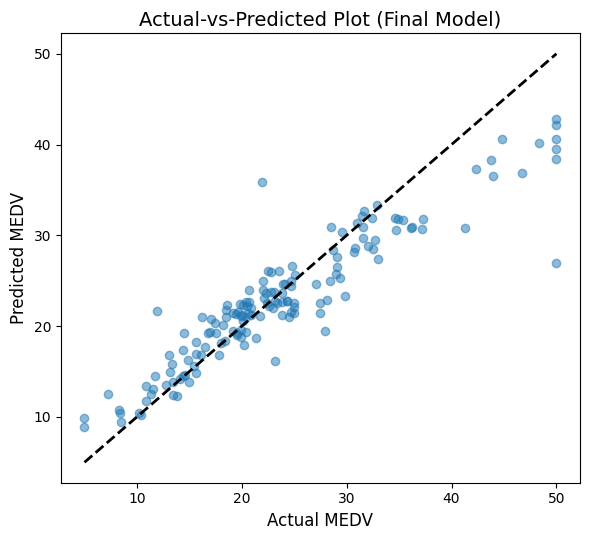

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#1:1 Scatter Plot
plt.figure(figsize=(6, 5.5))
plt.scatter(y_test_final_valid, y_pred_final_valid, alpha=0.5, color='#1f77b4')
plt.plot([y_test_final_valid.min(), y_test_final_valid.max()],
         [y_test_final_valid.min(), y_test_final_valid.max()],
         'k--', lw=2)
plt.xlabel('Actual MEDV', fontsize=12)
plt.ylabel('Predicted MEDV', fontsize=12)
plt.title('Actual-vs-Predicted Plot (Final Model)', fontsize=14)
plt.tight_layout()
plt.show()

## Extra Trees with {scikit-learn}


In Python, the scikit-learn library provides implementations of Extra Trees for both classification and regression tasks:

`ExtraTreesClassifier`: For classification problems.
`ExtraTreesRegressor`: For regression problems.

Key characteristics of Extra Trees in Python:

`Ensemble Method`: It builds multiple decision trees and combines their predictions (e.g., through voting for classification or averaging for regression) to make a final prediction.

`Random Subsampling`: Each tree in the ensemble is built on a random subset of the original training data, sampled without replacement.

`Random Feature Selection`: At each split node within a tree, a random subset of features is considered for splitting, similar to Random Forests.

`Random Split Point Selection`: The most distinct feature of Extra Trees is the random selection of the split point. Instead of finding the optimal split point based on criteria like Gini impurity or entropy (as in standard decision trees), Extra Trees randomly selects a split point within the range of the chosen feature. This further increases the diversity of the individual trees.

### Classification Example

In [127]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

#### Data

In [128]:
# Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


mf = pd.read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")
mf['product'] = mf['product'].astype('category')
mf['gender'] = mf['gender'].astype('category')

# Split data into train and test (stratified by product and gender)
mf['product_gender'] = mf['product'].astype(str) + '_' + mf['gender'].astype(str)
seeds = 11076
tr_prop = 0.70
train_df, test_df = train_test_split(
    mf,
    train_size=tr_prop,
    random_state=seeds,
    stratify=mf['product_gender']
)
train_df = train_df.drop(columns=['product_gender'])
test_df = test_df.drop(columns=['product_gender'])

# Prepare features and target
feature_cols = ["age", "household", "position_level", "absent", "gender"]
target_col = "product"
X_train_df = train_df[feature_cols]
y_train_df = train_df[target_col]
X_test_df = test_df[feature_cols]
y_test_df = test_df[target_col]

# Convert features to numeric matrix
le = LabelEncoder()
X_train_df['gender'] = le.fit_transform(X_train_df['gender'])
X_test_df['gender'] = le.transform(X_test_df['gender'])
X_train_matrix = X_train_df.values.astype(np.float64)
X_test_matrix = X_test_df.values.astype(np.float64)

# Encode target variable
le_target = LabelEncoder()
y_train_array = le_target.fit_transform(y_train_df)
y_test_array = le_target.transform(y_test_df)

/tmp/ipython-input-128-2219573613.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_df['gender'] = le.fit_transform(X_train_df['gender'])
/tmp/ipython-input-128-2219573613.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_df['gender'] = le.transform(X_test_df['gender'])


#### Initial ExtraTreesClassifier model

In [129]:
# Initial ExtraTreesClassifier model
initial_model = ExtraTreesClassifier(random_state=11076)
initial_model.fit(X_train_matrix, y_train_array)

ExtraTreesClassifier(random_state=11076)

#### Prediction and Evaluation

In [130]:
y_pred_initial = initial_model.predict(X_test_matrix)
initial_accuracy = accuracy_score(y_test_array, y_pred_initial)
print("Initial Model Performance:")
print(f"Accuracy: {initial_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_array, y_pred_initial,
                          target_names=le_target.classes_))

Initial Model Performance:
Accuracy: 0.7655

Classification Report:
              precision    recall  f1-score   support

           A       0.79      0.79      0.79       148
           B       0.69      0.80      0.74       137
           C       0.83      0.71      0.77       150

    accuracy                           0.77       435
   macro avg       0.77      0.77      0.77       435
weighted avg       0.77      0.77      0.77       435



#### Hyperparameter tuning

In [131]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    ExtraTreesClassifier(random_state=11076),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_matrix, y_train_array)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=11076),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [132]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("\nBest Parameters:", best_params)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [133]:
# Evaluate final model
y_pred_final = best_model.predict(X_test_matrix)
final_accuracy = accuracy_score(y_test_array, y_pred_final)
print("\nFinal Model Performance:")
print(f"Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_array, y_pred_final,
                          target_names=le_target.classes_))


Final Model Performance:
Accuracy: 0.7747

Classification Report:
              precision    recall  f1-score   support

           A       0.78      0.78      0.78       148
           B       0.70      0.87      0.77       137
           C       0.89      0.69      0.77       150

    accuracy                           0.77       435
   macro avg       0.79      0.78      0.77       435
weighted avg       0.79      0.77      0.77       435




Feature Importance:
          feature  importance
0             age    0.434670
1       household    0.355741
4          gender    0.126675
2  position_level    0.049897
3          absent    0.033017


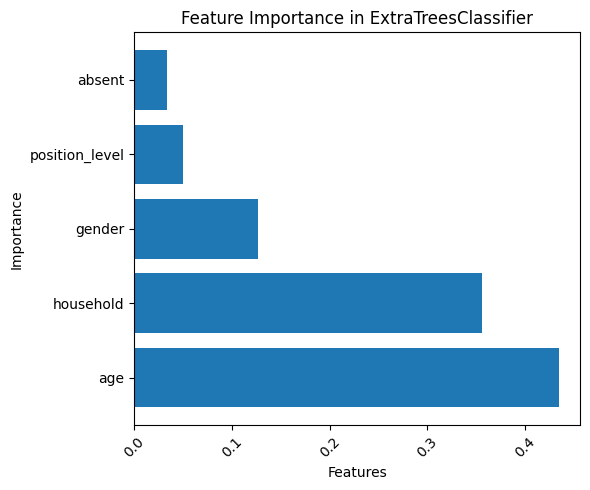

In [135]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importance
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(6, 5))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in ExtraTreesClassifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Regression Example

In [136]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Data

In [137]:
# Load and prepare Boston Housing data
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Set random seed for reproducibility
np.random.seed(123)

# Select relevant columns
df = df[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Convert CHAS to category
df['CHAS'] = df['CHAS'].astype('category')

# Ensure RAD and TAX are numeric
df['RAD'] = df['RAD'].astype(float)
df['TAX'] = df['TAX'].astype(float)

# Apply one-hot encoding to CHAS
df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)

# Split data into training (70%) and test (30%) sets
train, test = train_test_split(df, train_size=0.70, random_state=101)

# Feature scaling
scaler = StandardScaler()
numeric_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

# Define predictors and target
predictors = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CHAS_1']
available_predictors = [col for col in predictors if col in train.columns and col in test.columns]
X_train = train[available_predictors].values.astype(np.float64)
y_train = train['MEDV'].values.astype(np.float64)
X_test = test[available_predictors].values.astype(np.float64)
y_test = test['MEDV'].values.astype(np.float64)

#### Initial ExtraTreesRegressor model



In [138]:
# Initial ExtraTreesRegressor model
initial_model = ExtraTreesRegressor(random_state=123)
initial_model.fit(X_train, y_train)


ExtraTreesRegressor(random_state=123)

#### Prediction and Evaluation

In [139]:
# Evaluate initial model
y_pred_initial = initial_model.predict(X_test)
initial_mse = mean_squared_error(y_test, y_pred_initial)
initial_r2 = r2_score(y_test, y_pred_initial)
print("Initial Model Performance:")
print(f"Mean Squared Error: {initial_mse:.4f}")
print(f"R² Score: {initial_r2:.4f}")

Initial Model Performance:
Mean Squared Error: 14.9678
R² Score: 0.8492



#### Hyperparameter tuning

In [140]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    ExtraTreesRegressor(random_state=123),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [141]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("\nBest Parameters:", best_params)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [142]:
# Evaluate final model
y_pred_final = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)
print("\nFinal Model Performance:")
print(f"Mean Squared Error: {final_mse:.4f}")
print(f"R² Score: {final_r2:.4f}")


Final Model Performance:
Mean Squared Error: 15.4499
R² Score: 0.8443


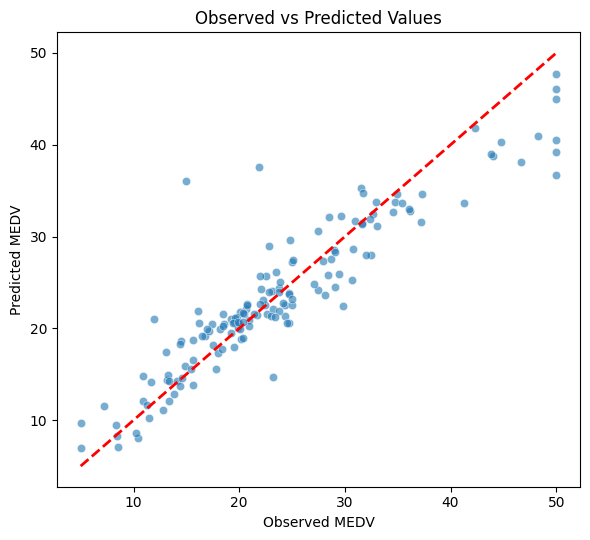

In [143]:
# Create 1:1 observed vs predicted plot
plt.figure(figsize=(6, 5.5))
sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Observed MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Observed vs Predicted Values')
plt.tight_layout()
plt.show()



Feature Importance:
    feature  importance
11    LSTAT    0.371807
4        RM    0.303746
9   PTRATIO    0.058983
3       NOX    0.047783
8       TAX    0.044453
2     INDUS    0.033219
6       DIS    0.032772
0      CRIM    0.032167
7       RAD    0.018813
5       AGE    0.018089
10        B    0.015209
12   CHAS_1    0.013119
1        ZN    0.009839


/tmp/ipython-input-145-1227196.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')


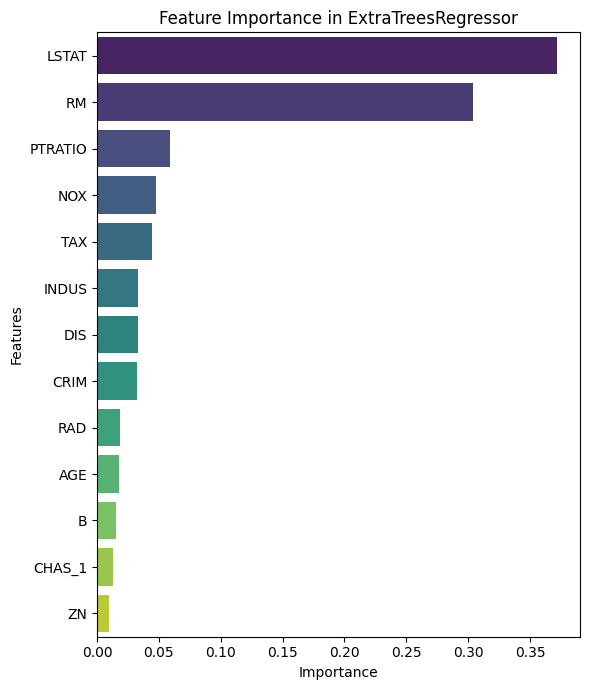

In [145]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': available_predictors,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
# Print feature importance
print("\nFeature Importance:")
print(feature_importance)


# Create feature importance plot with Seaborn
plt.figure(figsize=(6, 7))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance in ExtraTreesRegressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Summary and Conclusion
This notebook explored the Extra Trees algorithm in detail. We implemented it from scratch for both classification and regression to understand its inner workings, including random feature and split selection. We then demonstrated how to use {scikit-learn}'s more efficient implementations (`ExtraTreesClassifier` and `ExtraTreesRegressor`), showing that they generally offer better performance. We also covered hyperparameter tuning using grid search for both approaches and analyzed feature importance to identify key predictors in the datasets used (health insurance for classification and Boston Housing for regression).

## References


1.  Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction* (2nd ed.). Springer.\

2.  Geurts, P., Ernst, D., & Wehenkel, L. (2006). Extremely randomized trees. *Machine Learning*, 63(1), 3–42. https://doi.org/10.1007/s10994-006-6226-1

3.  CRAN. (2023). *extraTrees: Extremely Randomized Trees (ExtraTrees) for Regression and Classification*. R package version 0.8-12. https://cran.r-project.org/web/packages/extraTrees/index.html

4.  Sim, J. (2016). *Extremely Randomized Trees with R*. R-bloggers. https://www.r-bloggers.com/2016/04/extremely-randomized-trees-with-r/

5. [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

6. [ExtraTreesRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)

7. [Extra Trees, Explained: A Visual Guide with Code Examples](https://medium.com/@samybaladram/extra-trees-explained-a-visual-guide-with-code-examples-4c2967cedc75)